In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#Before moving on with the data reduction it is important to focus on the preprocessing of the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# filling the missing value of age
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

In [13]:
# Converting the age into the int type
df['Age'] = df['Age'].astype(int)

In [15]:
# Droping the cabin number as it is not important
df.drop(columns=['Cabin'],inplace= True)

In [17]:
most_frequent_embarked = df['Embarked'].value_counts().index[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

In [19]:
# One hot encoding for the categorical attributes
df = pd.get_dummies(df,columns=['Sex'],dtype=int)

In [21]:
df = pd.get_dummies(df,columns=['Survived'],dtype=int)
df = pd.get_dummies(df,columns=['Pclass'],dtype=int)

In [23]:
# Feature Engineering for combining the two attribute like age SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # for 1 to add the passenger himself 

In [25]:
# Droping the Sibsp and the Parch 
df.drop(columns=['SibSp','Parch'],inplace= True)

In [27]:
df

,PassengerId,Name,Age,Ticket,Fare,Embarked,Sex_female,Sex_male,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,FamilySize
0,1,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,S,0,1,1,0,0,0,1,2
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71.2833,C,1,0,0,1,1,0,0,2
2,3,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,S,1,0,0,1,0,0,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,S,1,0,0,1,1,0,0,2
4,5,"Allen, Mr. William Henry",35,373450,8.0500,S,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27,211536,13.0000,S,0,1,1,0,0,1,0,1
887,888,"Graham, Miss. Margaret Edith",19,112053,30.0000,S,1,0,0,1,1,0,0,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,S,1,0,1,0,0,0,1,4
889,890,"Behr, Mr. Karl Howell",26,111369,30.0000,C,0,1,0,1,1,0,0,1


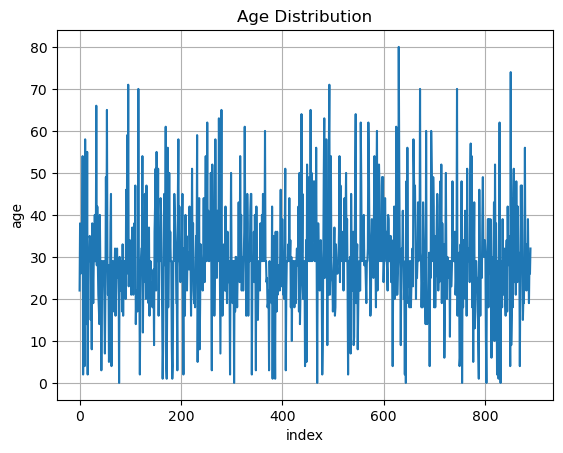

In [31]:
#Finding the plot of the age to see detect the outliers
import matplotlib.pyplot as plt
df['Age'].plot(kind='line')
plt.title('Age Distribution')
plt.ylabel("age")
plt.xlabel("index")
plt.grid(True)
plt.show()

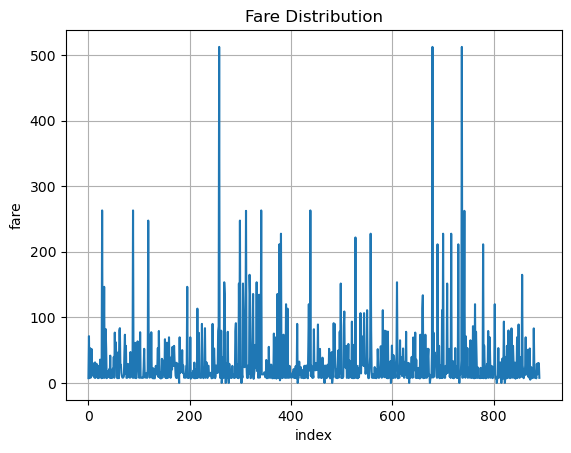

In [33]:
# Finding the outliers for the fare
df['Fare'].plot(kind='line')
plt.title('Fare Distribution')
plt.ylabel("fare")
plt.xlabel("index")
plt.grid(True)
plt.show()

In [39]:
#Concept Hierarchy Generation for Nominal Data
df['EmbarkedRegion'] = df['Embarked'].map({'C':'Europe','S':'Europe','Q':'Other'})
df.drop(columns=['Embarked'],inplace=True)

KeyError: 'Embarked'

In [43]:
#Converting the EmbarkedRegion to the one-hot-encoding
df = pd.get_dummies(df,columns=['EmbarkedRegion'],dtype=int)

In [35]:
# Z-Score Standarziation for the fare
from sklearn.preprocessing import StandardScaler
z_scaler = StandardScaler()
df['Fare'] = z_scaler.fit_transform(df[['Fare']])

In [29]:
# Min-Max score for the Age
from sklearn.preprocessing import MinMaxScaler
m_scaler = MinMaxScaler()
df['Age'] = m_scaler.fit_transform(df[['Age']])

In [31]:
# Dimensionally Reduction by removing the unwanted features
# Unwanted Features: Ticket,Name,Passenger id
df.drop(columns=['Ticket','Name','PassengerId'],inplace=True)

In [47]:
df.dtypes

Age                      float64
Fare                     float64
Sex_female                 int32
Sex_male                   int32
Survived_0                 int32
Survived_1                 int32
Pclass_1                   int32
Pclass_2                   int32
Pclass_3                   int32
FamilySize                 int64
EmbarkedRegion_Europe      int32
EmbarkedRegion_Other       int32
dtype: object

In [51]:
#Defining the key features and the numerical features
y = df['Survived_1']
x = df.drop(columns=['Survived_0','Survived_1','Sex_female','Pclass_3','EmbarkedRegion_Other'])

In [53]:
x

,Age,Fare,Sex_male,Pclass_1,Pclass_2,FamilySize,EmbarkedRegion_Europe
0,0.2750,7.2500,1,0,0,2,1
1,0.4750,71.2833,0,1,0,2,1
2,0.3250,7.9250,0,0,0,1,1
3,0.4375,53.1000,0,1,0,2,1
4,0.4375,8.0500,1,0,0,1,1
...,...,...,...,...,...,...,...
886,0.3375,13.0000,1,0,1,1,1
887,0.2375,30.0000,0,1,0,1,1
888,0.3625,23.4500,0,0,0,4,1
889,0.3250,30.0000,1,1,0,1,1


In [55]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived_1, Length: 891, dtype: int32

In [57]:
import statsmodels.api as sm
# Add intercept term
X = sm.add_constant(x)
# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()
# Print p-values
print("P-values for each predictor:\n", logit_model.pvalues)

Optimization terminated successfully.
         Current function value: 0.443154
         Iterations 6
P-values for each predictor:
 const                    2.030642e-07
Age                      5.999926e-07
Fare                     1.917377e-01
Sex_male                 4.579982e-43
Pclass_1                 1.379465e-13
Pclass_2                 4.002520e-07
FamilySize               5.808273e-04
EmbarkedRegion_Europe    3.693524e-01
dtype: float64


In [59]:
#Using the attribute sub set selections
# if the p value > 0.05 then it is not significant to given target value
# So from the given p-values we can remove the Fare and the EmbarkedRegion_Europe
df.drop(columns=['Fare','EmbarkedRegion_Europe','EmbarkedRegion_Other'],inplace=True)

In [61]:
df

,Age,Sex_female,Sex_male,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,FamilySize
0,0.2750,0,1,1,0,0,0,1,2
1,0.4750,1,0,0,1,1,0,0,2
2,0.3250,1,0,0,1,0,0,1,1
3,0.4375,1,0,0,1,1,0,0,2
4,0.4375,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0.3375,0,1,1,0,0,1,0,1
887,0.2375,1,0,0,1,1,0,0,1
888,0.3625,1,0,1,0,0,0,1,4
889,0.3250,0,1,0,1,1,0,0,1


In [63]:
# Using the sampling technique to gain the sub-set of the data set used in the data set
df_sampled = df.sample(frac=0.5,random_state=42)
df_sampled

,Age,Sex_female,Sex_male,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,FamilySize
709,0.3625,0,1,0,1,0,0,1,3
439,0.3875,0,1,1,0,0,1,0,1
840,0.2500,0,1,1,0,0,0,1,1
720,0.0750,1,0,0,1,0,1,0,2
39,0.1750,1,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...
825,0.3625,0,1,1,0,0,0,1,1
188,0.5000,0,1,1,0,0,0,1,3
271,0.3125,0,1,0,1,0,0,1,1
662,0.5875,0,1,1,0,1,0,0,1
